# NLP Tasks
## NER Literature Review
The first NLP task performed on the dataset is “Named Entity Recognition” (NER). From a conducted literature review, NER, sometimes known as entity identification, is a process of analysing a piece of text and identifying and/or classifying named entities within it. These Named entities can be people, products, organisations, money etc. 

Using Named Entity Recognition to identify makes and/or models from an open-source toolkit has been successfully completed previously by Rubens and Agarwal. Rubens and Agarwal were successful at identifying car brand names from craigslist advertisements with quite a high accuracy of 98.48%. However, this method was highly optimised, involving machine learning supplementation and the physical labelling of a training dataset. They found limitations such as misspelling of words in a forum based platform, or correctly identifying the car of interest if multiple cars are mentioned. 

Identifying makes of cars with NER was also completed by Keraghel et al, also using a deep learning approach to identify makes/models of cars from an online forum. Keraghel et al found limitations using the NER model as the automotive industry had a very small set of labelled data available. However, this limitation is more specific to a deep learning approach to NER in the automotive industry. At times, Keraghel et al was able to achieve accuracies of up to 96% with a deep learning approach. 

## Rationale for selecting NLP Task
The rational for using this NLP task is to identify the most mentioned car brands in the corpus, to assumedly identify the most problematic cars. From Fig. 10 and Fig. 11 in Document 2, specific makes and models of cars are mentioned more in the title of a post, showing that using Named Entity Recognition on post titles is more appropriate.

For this project, an open source toolkit from the sPaCy python package was used (en_core_web_sm). This toolkit uses a CNN algorithm to classify entities trained from the OntoNotes 5.0 release. OntoNotes (Linguistic Data Consoritum, 2013) was a collaborative project between two universities to annotate a large corpus of data, some of which were webblogs, which is ideal for this task. 


## Pre-processing of data

After the csv file of scraped data was loaded into python with a pandas dataframe, the only pre-processing that took place was to remove non-utf8 characters. Users often posted an emoticon such as “😊” in their post, disturbing any python processing. Words were not reduced to lowercase as the NER algorithm uses capital letters to correctly identify proper nouns (entities), and no stop word removal or lemmatisation took place to keep sentence structure to not confuse the algorithm.

In [ ]:
"""Code to demonstrate pre-processing of data before NER takes place"""

import spacy
import pandas as pd
import tqdm
from collections import Counter
import operator
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nlp = spacy.load("en_core_web_sm") # NER algorithm to be used

scraped_data = pd.read_csv("scraped_info.csv") #load in the data

scraped_data = scraped_data[["Title of Post", "Post Description"]] #extract only title and descriptions

# remove any not-utf8 encoded characters
scraped_data["Title of Post"] = scraped_data["Title of Post"].str.encode("ascii", "ignore").str.decode("ascii")
scraped_data["Post Description"] = scraped_data["Post Description"].str.encode("ascii", "ignore").str.decode("ascii")

## Hyperparameter

A hyperparameter is a parameter that is tuned during the learning process of a machine learning model (Deep AI, 2021). For this task, a machine learning model is used in the en_core_web_sm algorithm, and it can be considered as the hyperparameter, as it is the algorithm that decides which words in the corpus are entities. The python Counter function can also be considered as the hyperparameter in this case, as it counts the recognised entities to decide which entity is most mentioned (explained below).


100%|██████████| 7511/7511 [01:47<00:00, 70.04it/s] 


titles
[('Honda', 770), ('Ford', 154), ('Toyota', 130), ('Chevy', 101), ('Dodge', 84)]


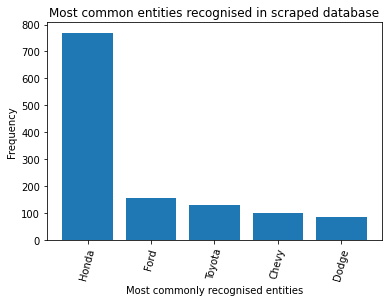

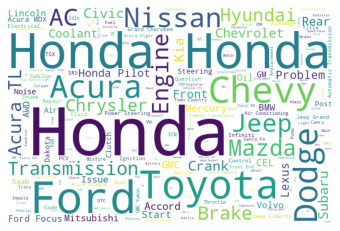

In [3]:
"""Code that identifies all entities, extracts the top 5 and graphs them"""
# extract the titles from the corpus
titles = scraped_data["Title of Post"]
titles = titles.tolist()

#extract the descriptions from the corpus
descriptions = scraped_data["Post Description"]
descriptions = descriptions.tolist()

organisations_titles = []

# for each title 
for title in tqdm.tqdm(titles):
    try:
        # apply the algorithm to the title
        title_raw = nlp(title)
        # find entities
        for word in title_raw.ents:
            # find entities that are organisations, denoted by a "ORG" label
            if word.label_ == "ORG":
                organisations_titles.append(word.text)
    except:
        pass

print("titles")
#count the extracted organsations list
top_organisations_titles = Counter(organisations_titles)
top_organisations_titles_ordered = sorted(top_organisations_titles.items(), key=operator.itemgetter(1), reverse=True)
# extract the top 5 organisations
top_five_organisations = top_organisations_titles_ordered[0:5]
print(top_five_organisations)

top_organisations_dict = dict(top_five_organisations)

# extract the most common brands as a list
organisations_list = list(top_organisations_dict.keys())

#plot the organisations
top_ten_keys = top_organisations_dict.keys()
values = top_organisations_dict.values()
plt.bar(top_ten_keys, values)
plt.xticks(rotation=75)
plt.xlabel("Most commonly recognised entities")
plt.ylabel("Frequency")
plt.title("Most common entities recognised in scraped database")
plt.show()

wc = WordCloud(background_color='white', height=400, width=600)
wc.generate(" ".join(organisations_titles))
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file("wordcloud_entities.png")


## Preliminary assessment of NLP task performance

The NER algorithm (en_core_web_sm) was applied to each post title, and each entity was extracted. If the entity label was “ORG”, the algorithm had identified the entity to be an organisation (make of a car), and this was stored into a list. After all organisations had been stored, the python Counter function was used to count the entities stored, and ordered these in descending order. The top five recognised entities and the amount they were recognised are shown below:

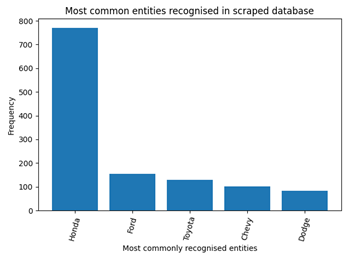

('Honda', 770), ('Ford', 154), ('Toyota', 130), ('Chevy', 101), ('Dodge', 84)

To analyse the accuracy of the NER algorithm, a comparison to Fig. 12 in Document 2 as Honda, Ford and Chevy are identified Entities that are also present in the top twenty words in a title. 

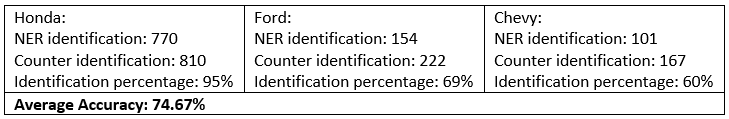


Table 2 – NER estimated accuracy


As no machine/deep learning method has been used, a formal quantitative assessment of results is difficult.  However, Table 2 shows that the NER algorithm demonstrated a reasonably high accuracy and is a sound result for this task. The accuracy is a lot lower than previous works analysed, however, a deep learning approach of a test and training set was not used for this task. 

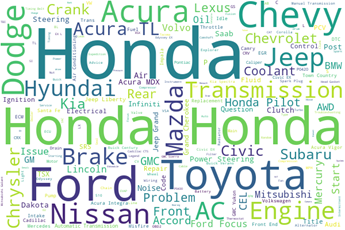

Figure 15 – Word Cloud of the Organisations identified

Fig. 15 shows that the algorithm was quite accurate at identifying organisations correctly, with only a few false positives that can be seen (such as “crank” and “steering” in the top left of image). To truly identify the precision of the algorithm, a dictionary would need to be made containing all makes of car to analysing the percentage of actual makes present in the identified list. 

## Processing of NLP task output

After the top 5 most mentioned entities were found, any post that contained one of those entities in the post title were extracted into their own csv files. Therefore, all posts containing “Honda” were separated to one csv file, all posts containing “Ford” were separated to another csv file and so on. 

In [4]:
"""Code to separate identified entities. Any post containing one of the top 5 recognised entities in the title is 
seaparated into its own csv file to be used later. All honda posts go to one csv file, all ford posts go to one csv file 
etc"""

column_names = ["Title of Post", "Post Description"]

filtered_data_first = pd.DataFrame(columns=column_names)
filtered_data_second = pd.DataFrame(columns=column_names)
filtered_data_third = pd.DataFrame(columns=column_names)
filtered_data_fourth = pd.DataFrame(columns=column_names)
filtered_data_fifth = pd.DataFrame(columns=column_names)

# iterate over organisations list
for organisation in tqdm.tqdm(organisations_list):
    # use try catch as some posts threw errors
    try:
        # iterate over all posts in the corpus
        for i in range(len(scraped_data)):
            post = scraped_data.iloc[i]
            # if an organisation is in the title of the post
            if organisation in post["Title of Post"]:
                # determine which organisation was identified, append that post to the respective dataframe
                if organisation == organisations_list[0]:
                    filtered_data_first = filtered_data_first.append(
                        {"Title of Post": post["Title of Post"], "Post Description": post["Post Description"]},
                        ignore_index=True)
                elif organisation == organisations_list[1]:
                    filtered_data_second = filtered_data_second.append(
                        {"Title of Post": post["Title of Post"], "Post Description": post["Post Description"]},
                        ignore_index=True)
                elif organisation == organisations_list[2]:
                    filtered_data_third = filtered_data_third.append(
                        {"Title of Post": post["Title of Post"], "Post Description": post["Post Description"]},
                        ignore_index=True)
                elif organisation == organisations_list[3]:
                    filtered_data_fourth = filtered_data_fourth.append(
                        {"Title of Post": post["Title of Post"], "Post Description": post["Post Description"]},
                        ignore_index=True)
                elif organisation == organisations_list[4]:
                    filtered_data_fifth = filtered_data_fifth.append(
                        {"Title of Post": post["Title of Post"], "Post Description": post["Post Description"]},
                        ignore_index=True)

    except:
        pass

# export pandas dataframes to csv file
filtered_data_first.to_csv("Top brand.csv", index=False)
filtered_data_second.to_csv("Second brand.csv", index=False)
filtered_data_third.to_csv("Third brand.csv", index=False)
filtered_data_fourth.to_csv("Fourth brand.csv", index=False)
filtered_data_fifth.to_csv("Fifth brand.csv", index=False)

print("Finished successfully")

100%|██████████| 5/5 [00:07<00:00,  1.52s/it]

Finished successfully


## POS Literature review

The second NLP task to take place was POS tagging to identify common faults (nouns) and a describing word to do with the fault (adverbs, verbs, adjectives). Work with POS tagging has been completed by many individuals. POS tagging involves analysing a sentence and classifying words into a part of speech (such as Noun, Verb, Proper Noun etc). Vanroose analysed POS tagging from a theoretical point of view, finding that most models used for POS tagging (rule based approaches, Markov models or supervised learning algorithms) were able to achieve accuracies of up to 97%.

However, Vanroose did talk about limitations for POS taggers in terms of the ambiguous use of the English language when humans communicate. Other research conducted (by Kumawat and Jain) found similar issues to Vanroose, in terms of ambiguous words for POS tagging. Depending on inflection and how words have been used in a sentence, words like “fly” can either be a noun or verb. The use of ambiguous text is used in social media and blog forums increases as humans tend to not communicate in a formal manner in these platforms.

## Rationale for POS task/Data preprocessing of inputs

POS tagging was chosen to be the next NLP task as after stop word removal and lemmatisation of the dataset, the only text that should be left in the corpus should have a high relevancy to the fault being posted about. A common noun might be “transmission” and a common descriptor in the same sentence might be “clunking”. If this can be achieved, the NLP prototype is successful at identifying common faults for a respective entity, which aligns to the overall project. 

Words such as “car”, “problem”, “issue” and “Thanks” were considered as stop words, as they as they add no meaning to a post description. For this NLP task, the en_core_web_sm algorithm from sPaCy was also used for POS tagging. 

## Hyperparameter
The hyperparameter for this task is similar to the first task. As the only algorithm used is the en_core_web_sm algorithm, it can be considered as the hyperparameter, as it determines the POS tag for each word, and python counter function determines it's importance/weighting.


In [6]:
"""Code to identify the 5 most common nouns for each of the 5 most common entities identified"""

import operator
from collections import Counter
import nltk
import pandas as pd
import spacy
import tqdm
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def remove_stop_words(dataset):
    """A function to remove stop words"""
    for j in range(len(dataset)):
        current_description = dataset.iloc[j]["Post Description"]

        tokenised_description = word_tokenize(current_description)
        filtered_description = []

        for word in tokenised_description:
            if word not in stop_words:
                filtered_description.append(word)
        new_description = " ".join(filtered_description)

        dataset.iloc[j]["Post Description"] = new_description

    return dataset


def lemmatise_dataset(dataset):
    """A function to lemmatise the dataset"""
    for i in range(len(dataset)):
        current_description = dataset.iloc[i]["Post Description"]
        word_list = nltk.word_tokenize(current_description)
        lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
        dataset.iloc[i]["Post Description"] = lemmatized_output

        return dataset


def get_descriptions(index):
    """A function to get respective descriptions depending on a given index"""
    if index == 0:
        descriptions = top_dataframe["Post Description"]
        descriptions = descriptions.tolist()
    elif index == 1:
        descriptions = second_dataframe["Post Description"]
        descriptions = descriptions.tolist()
    elif index == 2:
        descriptions = third_dataframe["Post Description"]
        descriptions = descriptions.tolist()
    elif index == 3:
        descriptions = fourth_dataframe["Post Description"]
        descriptions = descriptions.tolist()
    elif index == 4:
        descriptions = fifth_dataframe["Post Description"]
        descriptions = descriptions.tolist()

    return descriptions


# add common car terms to stop words list as they do nor provide information on part failures
stop_words.add('car')
stop_words.add('problem')
stop_words.add('issue')
stop_words.add("Thanks")

# load in the dataframes from the csv files
top_dataframe = pd.read_csv("Top brand.csv")
second_dataframe = pd.read_csv("Second brand.csv")
third_dataframe = pd.read_csv("Third brand.csv")
fourth_dataframe = pd.read_csv("Fourth brand.csv")
fifth_dataframe = pd.read_csv("Fifth brand.csv")

# remove stop words and lemmatize all datasets
top_dataframe = remove_stop_words(top_dataframe)
top_dataframe = lemmatise_dataset(top_dataframe)

second_dataframe = remove_stop_words(second_dataframe)
second_dataframe = lemmatise_dataset(second_dataframe)

third_dataframe = remove_stop_words(third_dataframe)
third_dataframe = lemmatise_dataset(third_dataframe)

fourth_dataframe = remove_stop_words(fourth_dataframe)
fourth_dataframe = lemmatise_dataset(fourth_dataframe)

fifth_dataframe = remove_stop_words(fifth_dataframe)
fifth_dataframe = lemmatise_dataset(fifth_dataframe)

# initialise top_nouns list 
top_nouns = []

for i in range(0, 5):
    # iterate over csv files
    post_descriptions = get_descriptions(i)
    current_nouns = []
    # iterate over all descriptions in the dataset
    for description in tqdm.tqdm(post_descriptions):
        # apply the algorithm to the description
        words = nlp(description)
        for word in words:
            if word.pos_ == "NOUN":
                # if a noun is found, append it to the list
                current_nouns.append(word.text)
    # find the most frequent nouns for this respective csv file
    top_nouns_found = Counter(current_nouns)
    top_nouns_ordered = sorted(top_nouns_found.items(), key=operator.itemgetter(1), reverse=True)
    top_nouns_ordered = top_nouns_ordered[0:5]
    # add the most frequent nuns to the top_nouns list
    top_nouns.append(top_nouns_ordered)

# print the list vertically to be seen easier from the user
print(*top_nouns, sep="\n")

100%|██████████| 54/54 [00:01<00:00, 39.42it/s]

[('engine', 285), ('time', 120), ('miles', 116), ('fuel', 114), ('sensor', 111)]
[('engine', 46), ('fuel', 33), ('side', 29), ('sensor', 26), ('noise', 22)]
[('engine', 42), ('fuel', 25), ('sensor', 23), ('spark', 18), ('pump', 18)]
[('engine', 56), ('oil', 36), ('sensor', 31), ('fuel', 27), ('air', 24)]
[('engine', 19), ('battery', 17), ('transmission', 16), ('side', 15), ('time', 15)]


## Preliminary assessment of NLP task performance
As a deep learning approach has not been used, a formal estimation of results, such as a confusion matrix, is not as simple to do. However, the identified words can be analysed to investigate if meaning can be drawn from them.

For each of the five csv’s created from the previous NLP task, the post descriptions are analysed, and all words have their POS tagged. The 5 most mentioned nouns are extracted to a list for each of the five most common entities, and this list is counted using the python Counter function. The first list is relevant to the most common entity, and so on. The results are as follows:

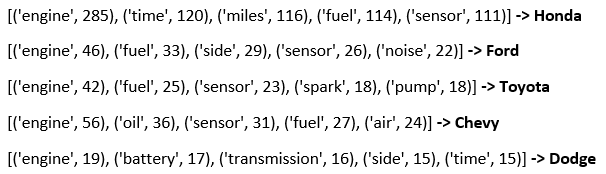

When analysing the results above, the POS algorithm did identify problematic car parts correctly. For each respective make of car, understanding can be gained as to common problems/faults for that make, indicating a successful NLP task. Using POS tagging to identify car problems as nouns is shown to be successful for this project.  


In [9]:
"""Code to identify the most common describing word for each noun that was found in the previous block of code"""
def merge_lists(list1, list2):
    """A function to merge lists together to tuples"""
    combined_list = [(list1[n], list2[n]) for n in range(0, len(list1))]
    return combined_list

top_verbs = []

for i in range(0, 5):
    # iterate over the 5 csv files saved from NER output
    new_post_descriptions = get_descriptions(i)
    # extract the desired 5 nouns for that respective dataset
    nouns = [new_tuple[0] for new_tuple in top_nouns[i]] 

    top_current_verbs = []
    # for each of the five nouns
    for i in range(len(nouns)):
        current_verbs = []
        # iterate over each post description
        for description in new_post_descriptions:
            current_noun = nouns[i]
            # if the current noun being analysed is found in a description
            if current_noun in description:
                # split the description at the full stops to extract individual sentences of the description
                description = description.split(".")
                for sentence in description:
                    # if the noun is found in the sentence, find verbs, adverbs and adjectives in that sentence. These
                    # parts of speech are chosen as they will describe what is being talked about with that specific
                    # noun
                    if current_noun in sentence:
                        words = nlp(sentence)
                        for word in words:
                            # if word is a verb, adverb or adjective, store it
                            if word.pos_ == "VERB" or word.pos_ == "ADV" or word.pos_ == "ADJ":
                                current_verbs.append(word.text)
        # count all of the verbs, adverbs and adjectives found                        
        top_verbs_found = Counter(current_verbs)
        top_verbs_ordered = sorted(top_verbs_found.items(), key=operator.itemgetter(1), reverse=True)
        # keep only the most frequent word
        top_verb = top_verbs_ordered[0]
        top_current_verbs.append(top_verb)
    top_verbs.append(top_current_verbs)
print(*top_verbs, sep="\n")
# here, the top verb/describing word for each of the 5 nouns is found, as a list of 5 values. Append each of these lists
# to the top verbs list. So that the top verbs list contains 5 lists of verbs
top_nouns_and_verbs_found = []
for i in range(0, 5):
    nouns_list = [a_top_nouns[0] for a_top_nouns in top_nouns[i]]
    verbs_list = [a_top_verbs[0] for a_top_verbs in top_verbs[i]]
    # merges the top nouns and top verbs lists together to be displayed
    merged_list = merge_lists(nouns_list, verbs_list)
    top_nouns_and_verbs_found.append(merged_list)

    #print list vertically to be displayed easier
print(*top_nouns_and_verbs_found, sep="\n")

[('idle', 20), ('sometimes', 26), ('ago', 9), ('replaced', 26), ('replaced', 27)]
[('said', 5), ('replaced', 6), ('coming', 5), ('done', 4), ('coming', 3)]
[('start', 5), ('good', 5), ('replaced', 7), ('new', 6), ('replaced', 4)]
[('start', 8), ('new', 8), ('replaced', 7), ('changed', 6), ('cold', 5)]
[('When', 3), ('key', 4), ('high', 3), ('rear', 5), ('key', 4)]
[('engine', 'idle'), ('time', 'sometimes'), ('miles', 'ago'), ('fuel', 'replaced'), ('sensor', 'replaced')]
[('engine', 'said'), ('fuel', 'replaced'), ('side', 'coming'), ('sensor', 'done'), ('noise', 'coming')]
[('engine', 'start'), ('fuel', 'good'), ('sensor', 'replaced'), ('spark', 'new'), ('pump', 'replaced')]
[('engine', 'start'), ('oil', 'new'), ('sensor', 'replaced'), ('fuel', 'changed'), ('air', 'cold')]
[('engine', 'When'), ('battery', 'key'), ('transmission', 'high'), ('side', 'rear'), ('time', 'key')]


For each csv file, if a sentence in a post description contained at least one of the identified nouns (from above), the most common adjective, adverb or verb in the same sentence is identified. This will assumedly describe the noun (problem). The results are as follows:

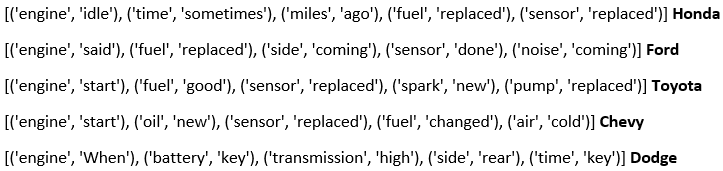

This NLP task appears to be successful, however, not as successful as intended. These additional verbs do provide the desired extra detail, however, this task can be refined to produce the desired detail. It is assumed that Honda engines have issues when idling, or that Toyota and Chevy engines have issues when starting. The word “replaced” is also present quite often, it can be deduced that after a part has been replaced, a different issue is occurring. This shows that the NLP prototype is successful for the overall project, however needs to be refined when identifying describing words relative to the problem in the car.

When analysing the given results and comparing them to the previous works with POS taggers analysed, the POS tagger has indeed tagged the words correctly and performed well at distinguishing ambiguous use of language in web blogs. The POS tagger has successfrully found problematic car parts (nouns) and at times, accurately identified a describing word for the car part. If this model were to be improved and optimised for an automotive landscape, it can be assumed that the POS algorithm used is operating at or near to the 97% accuracy mentioned by Vanroose. 

## Conclusion

As an overall analysis, this NLP prototype is very successful. Using Named Entity Recognition on a large corpus of automotive data is extremely accurate at identifying the makes of cars present. If this is rolled out to a development team, a more optimised model can be used for NER such as incorporating a dictionary or deep learning with a labelled training set.

The POS tagging to identify faults (nouns) is also relatively accurate at identifying what the most common fault is for a make of car. However, identifying adverbs, adjectives and verbs to help describe the problem/fault could be improved for further implementation. Overall, this NLP prototype is successful for the proposed NLP project. 

### Bibliography

Deep AI. (2021, May 29). Hyperparameter. Retrieved from Deep AI: https://deepai.org/machine-learning-glossary-and-terms/hyperparameter

Keraghel, A., Benabdeslem, K., & Canitia, B. (2020). Data augmentation process to improve deep
learning-based NER task in the automotive industry field. IEEE, https://sci-hub.se/https://ieeexplore.ieee.org/document/9207241

Kumawat, D., & Jain, V. (2015). POS Tagging Approaches: A Comparison, https://www.researchgate.net/publication/277907730_POS_Tagging_Approaches_A_Comparison 

Linguistic Data Consoritum. (2013, 16 October). Home › Language Resources › Data. Retrieved from https://catalog.ldc.upenn.edu/LDC2013T19

Rubens, M., & Agarwal, P. (2002). Information Extraction from Online Automotive Classifieds, https://nlp.stanford.edu/courses/cs224n/2004/cs224n_final_mrubens_agarwalp.pdf

Vanroose, P. (2004). Part-Of-Speech Tagging, https://www.researchgate.net/publication/2884842_Part-Of-Speech_Tagging
